In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


> Reference : https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710

# Importing all necessary libraries

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

# Importing all CSV Files

In [3]:
AllCSV = [i for i in glob.glob('/kaggle/input/youtube-new/*.{}'.format('csv'))]
AllCSV

['/kaggle/input/youtube-new/GBvideos.csv',
 '/kaggle/input/youtube-new/MXvideos.csv',
 '/kaggle/input/youtube-new/KRvideos.csv',
 '/kaggle/input/youtube-new/DEvideos.csv',
 '/kaggle/input/youtube-new/FRvideos.csv',
 '/kaggle/input/youtube-new/USvideos.csv',
 '/kaggle/input/youtube-new/INvideos.csv',
 '/kaggle/input/youtube-new/RUvideos.csv',
 '/kaggle/input/youtube-new/JPvideos.csv',
 '/kaggle/input/youtube-new/CAvideos.csv']

# Reading One CSV File into a dataframe

In [4]:
data = pd.read_csv('/kaggle/input/youtube-new/INvideos.csv')
data.shape

(37352, 16)

In [5]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [6]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

# Fixing Data Types

In [7]:

data['video_id']=data['video_id'].astype('str')


data['trending_date']=data['trending_date'].astype('str')
date_pieces=data['trending_date'].str.split('.')
data['Year'] = date_pieces.str[0].astype('int')
data['Day']=date_pieces.str[1].astype('int')
data['Month']=date_pieces.str[2].astype('int')


updatedyear = []
for i in range(len(data)): 
    y = data.loc[i, "Year"]
    newy = y+2000
    updatedyear.append(newy)
        
for i in range(len(data)):
    newy = updatedyear[i]
    tr = data.loc[i, "Year"]
    data['Year'].replace(to_replace = tr, value = newy, inplace=True)
    
data['trending_date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
data['title'] = data['title'].astype('str')

data['channel_title']= data['channel_title'].astype('str')
data['category_id'] = data['category_id'].astype('str')
data["tags"]= data['tags'].astype('str')
data['thumbnail_link'] = data['thumbnail_link'].astype('str')

data['comments_disabled'] = data['comments_disabled'].astype('category') 
data['ratings_disabled'] = data['ratings_disabled'].astype('category') 
data['video_error_or_removed'] = data['video_error_or_removed'].astype('category') 
data['description']= data['description'].astype('str')

data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
    

In [8]:
data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
Year                               int64
Day                                int64
Month                              int64
dtype: object

In [9]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017,14,11
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017,14,11
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017,14,11
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2017,14,11
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017,14,11


In [10]:
data.set_index('video_id', inplace=True)

# Setting index

In [11]:
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017,14,11
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017,14,11
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017,14,11
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2017,14,11
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017,14,11


# Checking for missing values

In [12]:
data.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
Year                      0
Day                       0
Month                     0
dtype: int64

> combining all datasets into one dataframe

# Before making any changes to the combined dataset, we create a backup dataframe, just in case 

In [13]:
# Making copy of original dataframe
backup_df = data.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

> Sorting the Dataset based on trending_date

In [14]:
# Sorting according to latest trending date while removing duplicates
data = data.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')


In [15]:
data.shape

(16307, 18)

In [16]:
# Printing results
data[['publish_time','trending_date']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_time,trending_date
video_id,,
wERgpPK44w0,2018-06-10 04:29:54,2018-06-14
w8jWRfnyT4g,2018-06-13 13:48:30,2018-06-14
wc81f_X9pec,2018-06-12 12:30:03,2018-06-14
Q3L0gArhmaE,2018-06-12 18:30:01,2018-06-14
A9QZPy7AuWk,2018-06-13 13:09:23,2018-06-14


#  Inserting Category Column

In [17]:

data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,
wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10 04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,2018,14,6
w8jWRfnyT4g,2018-06-14,Auto Scenes-Types of Customers || Mahathalli,Mahathalli,24,2018-06-13 13:48:30,"telugu comedy videos|""telugu funny videos""|""te...",219488,6330,214,1062,https://i.ytimg.com/vi/w8jWRfnyT4g/default.jpg,False,False,False,"Cast : Jahnavi DasettyDOP : Sekhar Boon, Seshi...",2018,14,6
wc81f_X9pec,2018-06-14,Casting Couch S3E5 Sonali Kulkarni with Amey &...,Bharatiya Digital Party,23,2018-06-12 12:30:03,"bhartiya digital party|""bhadipa latest""|""marat...",134628,4111,165,380,https://i.ytimg.com/vi/wc81f_X9pec/default.jpg,False,False,False,Suhana Presents: Casting Couch with Amey & Nip...,2018,14,6
Q3L0gArhmaE,2018-06-14,SOMEONE STOP THIS MADMAN!,PewDiePie,24,2018-06-12 18:30:01,"SATIRE|""flex seal""|""flex spray""|""flex commerci...",3893338,289795,8865,32839,https://i.ytimg.com/vi/Q3L0gArhmaE/default.jpg,False,False,False,We review the classic flex seal meme and the n...,2018,14,6
A9QZPy7AuWk,2018-06-14,Mogalirekulu | 13th June 2018 | Gemini TV,Gemini TV,24,2018-06-13 13:09:23,"Gemini TV|""Reality Show""|""Telugu Serials""|""Tel...",110298,1084,118,129,https://i.ytimg.com/vi/A9QZPy7AuWk/default.jpg,False,False,False,Mogalirekulu is a family drama show. The story...,2018,14,6


<Figure size 640x480 with 0 Axes>

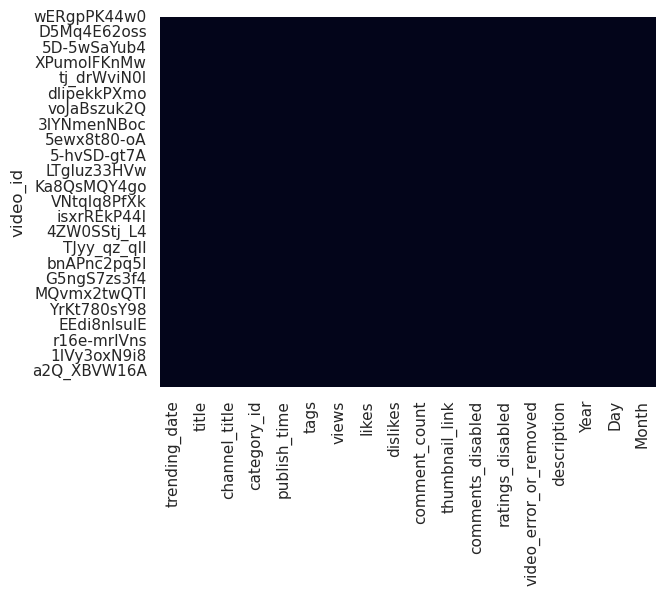

<Figure size 640x480 with 0 Axes>

In [18]:
sns.heatmap(data.isnull(), cbar=False)
plt.figure()

In [19]:
# read file
with open('/kaggle/input/youtube-new/IN_category_id.json', 'r') as f:  
    dataFile = f.read()
# parse file
obj = json.loads(dataFile)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [20]:
category_id = {}
with open('/kaggle/input/youtube-new/DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
data.insert(2, 'category', data['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
# Printing cleaned combined dataframe
data.head()

,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,,
wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Entertainment,Suresh Productions,24,2018-06-10 04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,2018,14,6
w8jWRfnyT4g,2018-06-14,Auto Scenes-Types of Customers || Mahathalli,Entertainment,Mahathalli,24,2018-06-13 13:48:30,"telugu comedy videos|""telugu funny videos""|""te...",219488,6330,214,1062,https://i.ytimg.com/vi/w8jWRfnyT4g/default.jpg,False,False,False,"Cast : Jahnavi DasettyDOP : Sekhar Boon, Seshi...",2018,14,6
wc81f_X9pec,2018-06-14,Casting Couch S3E5 Sonali Kulkarni with Amey &...,Comedy,Bharatiya Digital Party,23,2018-06-12 12:30:03,"bhartiya digital party|""bhadipa latest""|""marat...",134628,4111,165,380,https://i.ytimg.com/vi/wc81f_X9pec/default.jpg,False,False,False,Suhana Presents: Casting Couch with Amey & Nip...,2018,14,6
Q3L0gArhmaE,2018-06-14,SOMEONE STOP THIS MADMAN!,Entertainment,PewDiePie,24,2018-06-12 18:30:01,"SATIRE|""flex seal""|""flex spray""|""flex commerci...",3893338,289795,8865,32839,https://i.ytimg.com/vi/Q3L0gArhmaE/default.jpg,False,False,False,We review the classic flex seal meme and the n...,2018,14,6
A9QZPy7AuWk,2018-06-14,Mogalirekulu | 13th June 2018 | Gemini TV,Entertainment,Gemini TV,24,2018-06-13 13:09:23,"Gemini TV|""Reality Show""|""Telugu Serials""|""Tel...",110298,1084,118,129,https://i.ytimg.com/vi/A9QZPy7AuWk/default.jpg,False,False,False,Mogalirekulu is a family drama show. The story...,2018,14,6


In [21]:
data['category'].unique()

array(['Entertainment', 'Comedy', 'Music', 'News & Politics', 'Shows',
       'Education', 'People & Blogs', 'Howto & Style', 'Film & Animation',
       'Gaming', 'Science & Technology', 'Sports', 'Movies', nan,
       'Autos & Vehicles', 'Travel & Events', 'Pets & Animals'],
      dtype=object)

> Exploratory Data Analysis

<AxesSubplot:xlabel='ratio', ylabel='category'>

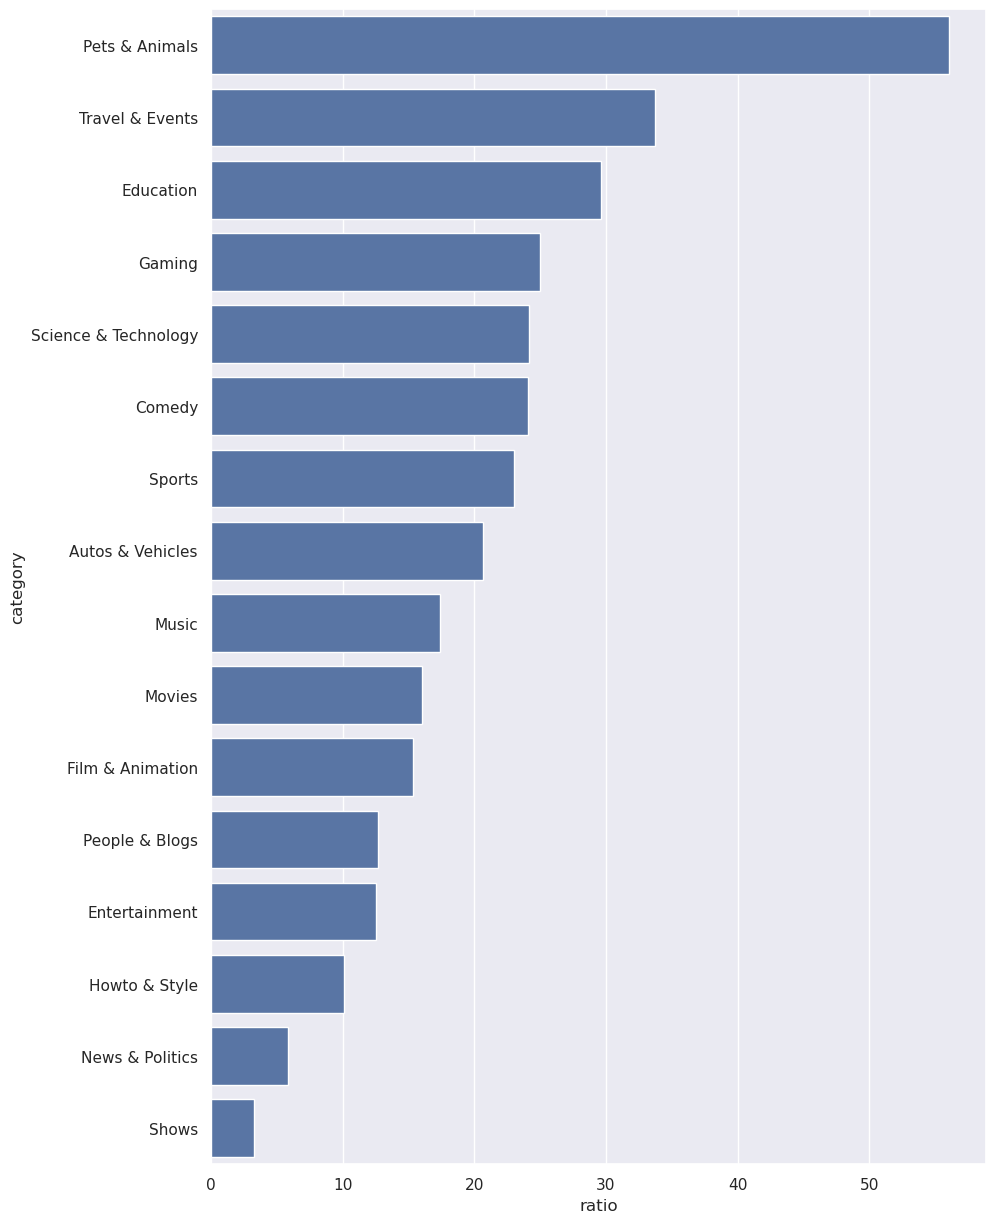

In [22]:
# calculating total likes for each category
likesdf = data.groupby('category')['likes'].agg('sum')

# calculating total dislikes for each category
dislikesdf = data.groupby('category')['dislikes'].agg('sum')

# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 

# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()


# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

# Observations:

* We see that Pets and Animals have highest ratio of likes/dislikes and Shows category have the lowest ratio for the same.
* From this we can infer that people are less divided on the content of videos based on entertainment than compared to topics such as Reality Shows and News, whose content can lead to a division of opinions among the user.

<Figure size 640x480 with 0 Axes>

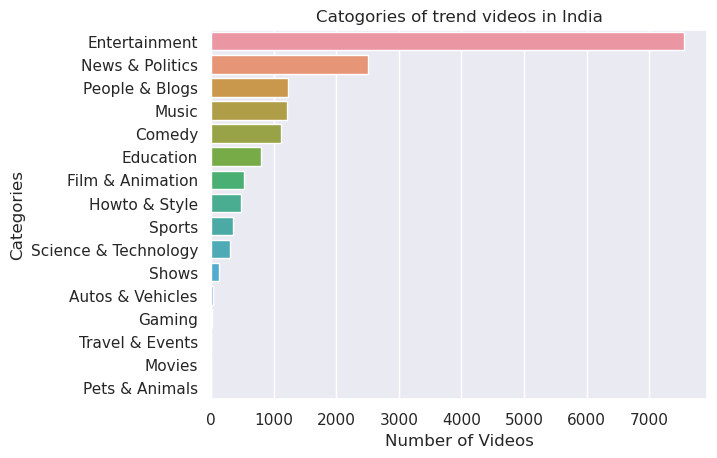

<Figure size 640x480 with 0 Axes>

In [23]:
tempdf = data['category'].value_counts().reset_index()
ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in India")
plt.figure()

* Entertainment has the highest magnitude of content available although content available for Gaming, travel, Movies and Pets have lowest.


In [24]:
temp = data.reset_index().sort_values(by = ['views'], ascending=False)
temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
temp.set_index('video_id', inplace=True)
temp.head(5)

,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,,
FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017,12,12
6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Entertainment,Marvel Entertainment,24,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,2017,7,12
u9Mv98Gr5pY,2018-05-01,VENOM - Official Trailer (HD),Entertainment,Sony Pictures Entertainment,24,2018-04-24 03:45:03,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",53822757,1250535,44796,135405,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,2018,1,5
QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Entertainment,Marvel Entertainment,24,2018-03-16 13:02:41,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",45064699,1494997,29812,186005,https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg,False,False,False,In theaters April 27. Get your tickets now: ht...,2018,22,3
rRr1qiJRsXk,2018-05-03,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,Entertainment,FoxStarHindi,24,2018-04-24 07:58:08,"Sanju Teaser|""Official Teaser""|""Sanju Official...",44171797,780895,30791,47829,https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...,2018,3,5


*3 out of top 5 trending videos can be spotted to have the tags as 'marvel', infereing that Marvel is super popular amongst the people

In [25]:
temp = data.reset_index().sort_values(by = ['likes'], ascending=False)
temp.set_index('video_id', inplace=True)
temp.head()

,trending_date,title,category,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,,
FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,YouTube Spotlight,24,2017-12-06 17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017,12,12
6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Entertainment,Marvel Entertainment,24,2017-11-29 13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,2017,7,12
dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",Music,TaylorSwiftVEVO,10,2018-01-12 05:00:01,"Taylor|""Swift""|""End""|""Game""|""Big""|""Machine""|""Pop""",42019590,1804377,100033,146917,https://i.ytimg.com/vi/dfnCAmr569k/default.jpg,False,False,False,Music video by Taylor Swift performing End Gam...,2018,18,1
2Vv-BfVoq4g,2017-11-15,Ed Sheeran - Perfect (Official Music Video),Music,Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",39082222,1721384,23137,90352,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,15,11
tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,Music,TaylorSwiftVEVO,10,2018-03-12 01:15:10,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",43738208,1658756,94043,148548,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,2018,18,3


* for this subset of dataset for India, most-viewed video proves to be the most-liked video

In [26]:

data.insert(4, 'publish_date', data['publish_time'].dt.date) # loc, column name, values for column to be inserted
data['publish_time'] = data['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
data['publish_date'] = pd.to_datetime(data['publish_date'], format = "%Y-%m-%d")

data.head()

,trending_date,title,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month
video_id,,,,,,,,,,,,,,,,,,,,
wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Entertainment,Suresh Productions,2018-06-10,24,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,2018,14,6
w8jWRfnyT4g,2018-06-14,Auto Scenes-Types of Customers || Mahathalli,Entertainment,Mahathalli,2018-06-13,24,13:48:30,"telugu comedy videos|""telugu funny videos""|""te...",219488,6330,214,1062,https://i.ytimg.com/vi/w8jWRfnyT4g/default.jpg,False,False,False,"Cast : Jahnavi DasettyDOP : Sekhar Boon, Seshi...",2018,14,6
wc81f_X9pec,2018-06-14,Casting Couch S3E5 Sonali Kulkarni with Amey &...,Comedy,Bharatiya Digital Party,2018-06-12,23,12:30:03,"bhartiya digital party|""bhadipa latest""|""marat...",134628,4111,165,380,https://i.ytimg.com/vi/wc81f_X9pec/default.jpg,False,False,False,Suhana Presents: Casting Couch with Amey & Nip...,2018,14,6
Q3L0gArhmaE,2018-06-14,SOMEONE STOP THIS MADMAN!,Entertainment,PewDiePie,2018-06-12,24,18:30:01,"SATIRE|""flex seal""|""flex spray""|""flex commerci...",3893338,289795,8865,32839,https://i.ytimg.com/vi/Q3L0gArhmaE/default.jpg,False,False,False,We review the classic flex seal meme and the n...,2018,14,6
A9QZPy7AuWk,2018-06-14,Mogalirekulu | 13th June 2018 | Gemini TV,Entertainment,Gemini TV,2018-06-13,24,13:09:23,"Gemini TV|""Reality Show""|""Telugu Serials""|""Tel...",110298,1084,118,129,https://i.ytimg.com/vi/A9QZPy7AuWk/default.jpg,False,False,False,Mogalirekulu is a family drama show. The story...,2018,14,6


# Maximum number of days to trending status for a video?

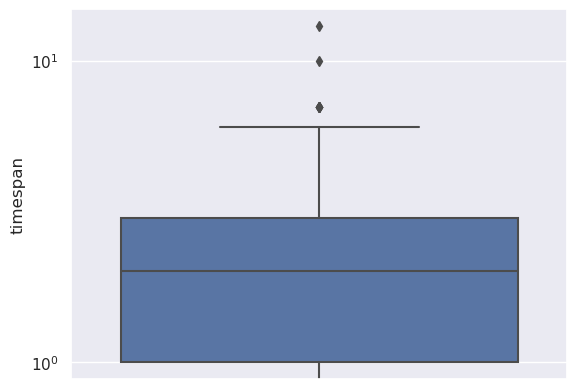

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


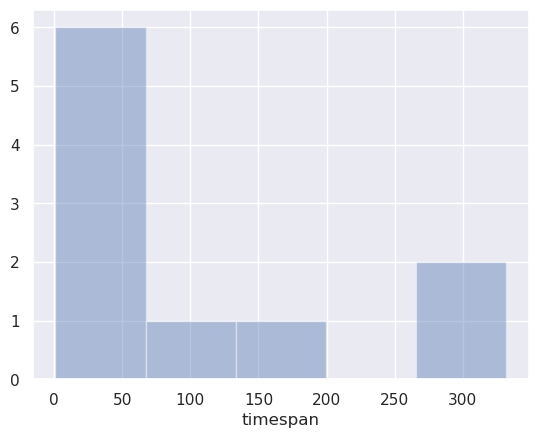

In [27]:
temp = data
temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
to_trending = temp.sample(1000).groupby('video_id').timespan.max()
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

In [28]:
temp = data
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes
category,,
Entertainment,4338774381,83842160
Music,2447689100,54100101
Comedy,798797761,38804393
Film & Animation,937246273,14212361
Science & Technology,199386704,9566636


* As we can see, most liked category is ‘Entertainment’ for all countries. This shows user preference to use YouTube as an entertainment platform.

# Users comment on which category the most?


In [29]:
temp = data
temp = temp.groupby('category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,comment_count
category,,,
Entertainment,4338774381,83842160,8970757
Music,2447689100,54100101,3450605
Science & Technology,199386704,9566636,3381982
Comedy,798797761,38804393,3117473
Film & Animation,937246273,14212361,1183364


In [30]:
data.head()

,trending_date,title,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Day,Month,timespan
video_id,,,,,,,,,,,,,,,,,,,,,
wERgpPK44w0,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Entertainment,Suresh Productions,2018-06-10,24,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,2018,14,6,4
w8jWRfnyT4g,2018-06-14,Auto Scenes-Types of Customers || Mahathalli,Entertainment,Mahathalli,2018-06-13,24,13:48:30,"telugu comedy videos|""telugu funny videos""|""te...",219488,6330,214,1062,https://i.ytimg.com/vi/w8jWRfnyT4g/default.jpg,False,False,False,"Cast : Jahnavi DasettyDOP : Sekhar Boon, Seshi...",2018,14,6,1
wc81f_X9pec,2018-06-14,Casting Couch S3E5 Sonali Kulkarni with Amey &...,Comedy,Bharatiya Digital Party,2018-06-12,23,12:30:03,"bhartiya digital party|""bhadipa latest""|""marat...",134628,4111,165,380,https://i.ytimg.com/vi/wc81f_X9pec/default.jpg,False,False,False,Suhana Presents: Casting Couch with Amey & Nip...,2018,14,6,2
Q3L0gArhmaE,2018-06-14,SOMEONE STOP THIS MADMAN!,Entertainment,PewDiePie,2018-06-12,24,18:30:01,"SATIRE|""flex seal""|""flex spray""|""flex commerci...",3893338,289795,8865,32839,https://i.ytimg.com/vi/Q3L0gArhmaE/default.jpg,False,False,False,We review the classic flex seal meme and the n...,2018,14,6,2
A9QZPy7AuWk,2018-06-14,Mogalirekulu | 13th June 2018 | Gemini TV,Entertainment,Gemini TV,2018-06-13,24,13:09:23,"Gemini TV|""Reality Show""|""Telugu Serials""|""Tel...",110298,1084,118,129,https://i.ytimg.com/vi/A9QZPy7AuWk/default.jpg,False,False,False,Mogalirekulu is a family drama show. The story...,2018,14,6,1


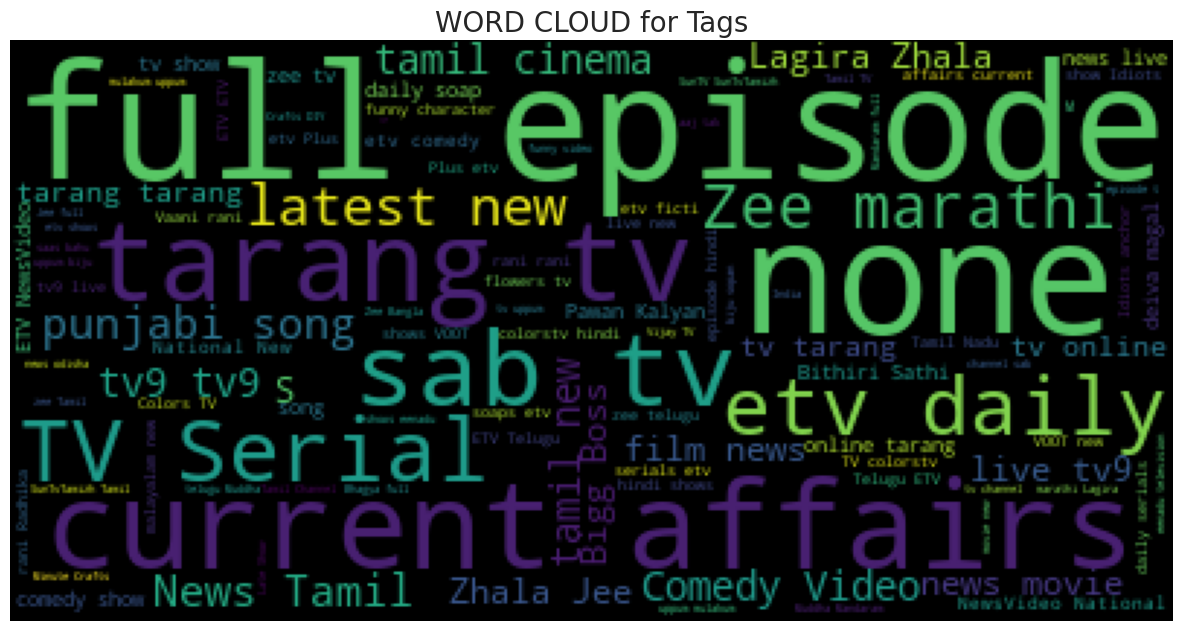

In [31]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
 background_color = 'black',
 stopwords = stopwords,
 max_words = 1000,
 max_font_size = 120,
 random_state = 42
 ).generate(str(data['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()

# Correlation between views, likes, dislikes, and comments

In [32]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = data[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.842418,0.584295,0.664996
likes,0.842418,1.000000,0.509207,0.760601
dislikes,0.584295,0.509207,1.000000,0.700620
comment_count,0.664996,0.760601,0.700620,1.000000


<Figure size 640x480 with 0 Axes>

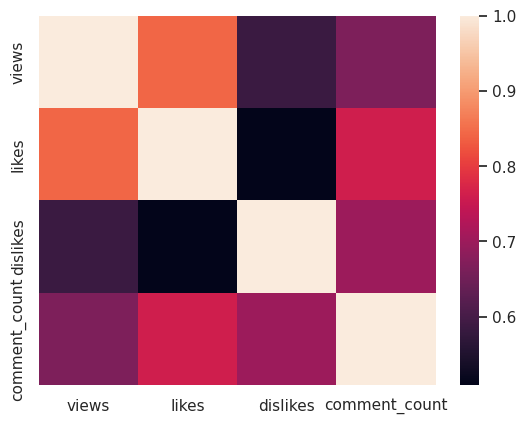

<Figure size 640x480 with 0 Axes>

In [33]:
sns.heatmap(corr)
plt.figure()

*When evaluating the correlation between all the variables, the correlation of each feature with itself is also included, which is always 1, so that is why the graph always has the red diagonal from the upper left to the lower right.

We can see from the results, there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count. We came to this conclusion as anytime the correlation coefficient, denoted as corr, is greater than zero, it’s a positive relationship.

*